In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix as cm
from itertools import permutations

matplotlib.style.use('dark_background')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def sigmoid(X, W):
    if len(X) == len(W) == 1:
        1 / (1 + np.exp(int(X) * int(W)))
    return 1 / (1 + np.exp(X @ W))

def eval_LR_model(X, y, iterations, alpha=1e-4, log=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    for i in range(1, iterations+1):
        y_pred = sigmoid(X, W)
        err, grad = calc_logloss(y, y_pred, X)
        W -= alpha * grad
        if i % (iterations / 10) == 0 and log:
            print(i, W, err)
    return W

In [3]:
classes = make_classification(n_samples=100,
                              n_features=2,
                              n_informative=2,
                              n_redundant=0,
                              n_classes=2,
                              random_state=1)
X = classes[0].copy()
y = classes[1].copy()
W = np.random.randn(2)

plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in classes[0]],
            [x[1] for x in classes[0]],
            c=classes[1],
            cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.grid(alpha=0.5)
plt.show()

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [4]:
def calc_logloss(y, y_pred, X=None):
    y_pred = np.clip(y_pred, 1e-4, np.max(y_pred))
    
    loss = - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    if X is not None:
        grad = 1 / X.shape[0] * X.T @ (y_pred - y).T
        return loss, grad
    
    return loss

In [5]:
y_pred = sigmoid(X, W)
calc_logloss(y, y_pred, X)

(1.5998095794871512, array([-0.6897692 , -0.18996618]))

2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.

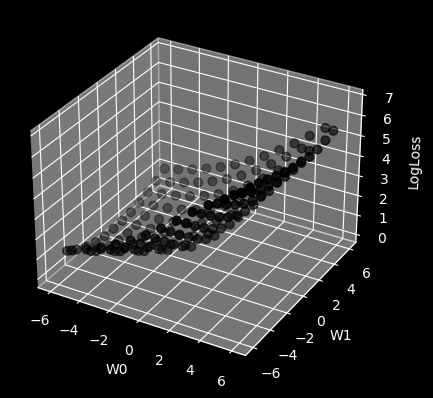

W0=-6.0  W1=-5.0  LogLoss=0.9017520868638484
W0=-6.0  W1=-4.0  LogLoss=0.5678065841880515
W0=-6.0  W1=-3.0  LogLoss=0.31672090274504305
W0=-6.0  W1=-2.0  LogLoss=0.15664891602633468
W0=-6.0  W1=-1.0  LogLoss=0.07916239057944177
W0=-6.0  W1=0.0   LogLoss=0.07474626729089988
W0=-6.0  W1=1.0   LogLoss=0.10851553565240125
W0=-6.0  W1=2.0   LogLoss=0.17567163752882312
W0=-6.0  W1=3.0   LogLoss=0.2990292977594722
W0=-6.0  W1=4.0   LogLoss=0.4779499925268547
W0=-6.0  W1=5.0   LogLoss=0.7043359461351639
W0=-6.0  W1=6.0   LogLoss=0.9761361366264866
W0=-5.0  W1=-6.0  LogLoss=1.5509069749899147
W0=-5.0  W1=-4.0  LogLoss=0.7212056885879649
W0=-5.0  W1=-3.0  LogLoss=0.4120771436545858
W0=-5.0  W1=-2.0  LogLoss=0.202361931203922
W0=-5.0  W1=-1.0  LogLoss=0.09366781346043211
W0=-5.0  W1=0.0   LogLoss=0.07553975807679439
W0=-5.0  W1=1.0   LogLoss=0.1128279844193042
W0=-5.0  W1=2.0   LogLoss=0.20059879107704465
W0=-5.0  W1=3.0   LogLoss=0.35962602663015075
W0=-5.0  W1=4.0   LogLoss=0.5829087079990989
W

In [6]:
Ws = np.array(list(permutations(np.linspace(-6, 6, 13), 2)))
results = np.array([
    Ws.T[0],
    Ws.T[1],
    np.array([calc_logloss(y, sigmoid(X, w)) for w in Ws]),
])

ax = plt.axes(projection='3d')
ax.scatter3D(results[0], results[1], results[2],
             c='black', s=40)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('LogLoss')
plt.show()

for i in range(results[0].shape[0]):
    print(f"W0={results[0][i]: <5} W1={results[1][i]: <5} LogLoss={results[2][i]: <5}")

__Ответ__: самый низкий результат был на весах -5 и 0. Всё не ординароно, но судя по результатам, гиперпараметры точно не положительные, то есть чем больше гиперпараметры при $w_0>0$ и $w_1>0$, тем больше ошибка.

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся X и W, которые уже посчитаны функцией eval_LR_model, и X.

In [7]:
def calc_pred_proba(X, y, W):
    n = X.shape[0]
    
    y_pred = np.zeros((1, n))
    W = eval_LR_model(X, y, iterations=2000, alpha=1e-2)
    W = W.reshape(X.shape[1], 1)
    A = sigmoid(X, W)
    
    for i in range(n):
        y_pred[0, i] = 1 - A[i, 0]
    return y_pred

In [8]:
calc_pred_proba(X, y, W).ravel()

array([1.00000000e+00, 1.00000000e+00, 1.42833684e-05, 1.83399724e-04,
       1.24564803e-11, 9.99990189e-01, 9.99999997e-01, 1.00000000e+00,
       2.32258385e-08, 5.09338606e-03, 1.14686038e-12, 5.46476363e-08,
       9.99997506e-01, 5.55777646e-13, 6.35582698e-10, 9.99996384e-01,
       7.19056164e-05, 9.99983047e-01, 8.87180107e-10, 7.97549345e-08,
       8.02913291e-13, 1.82545161e-07, 5.18001197e-11, 9.99999999e-01,
       1.62055250e-05, 7.20244476e-08, 1.21888106e-05, 1.14208909e-09,
       3.76795706e-10, 2.00395076e-05, 1.00000000e+00, 4.27778701e-10,
       1.02817754e-11, 9.63589424e-01, 4.24505668e-08, 1.74971149e-13,
       2.29294216e-08, 1.21682251e-06, 1.00000000e+00, 1.00000000e+00,
       9.99999985e-01, 4.60742555e-13, 8.34497881e-04, 9.99999996e-01,
       1.00000000e+00, 9.99999948e-01, 5.01006445e-07, 1.00000000e+00,
       1.10711440e-11, 9.99966176e-01, 3.96475277e-07, 3.40394379e-13,
       9.99999988e-01, 1.00487428e-08, 3.64397401e-11, 1.18833192e-04,
      

4. Создайте функцию calc_pred, возвращающую предсказанный класс (0 или 1). На вход подаётся X и W, которые уже посчитаны функцией eval_LR_model, а также порог вероятности.

In [9]:
def calc_pred(X, y, W):
    n = X.shape[0]
    
    y_pred = np.zeros((1, n))
    W = eval_LR_model(X, y, iterations=2000, alpha=1e-2)
    W = W.reshape(X.shape[1], 1)
    A = sigmoid(X, W)
    
    for i in range(n):
        if A[i, 0] > 0.5:
            y_pred[0, i] = 0
        elif A[i, 0] <= 0.5:
            y_pred[0, i] = 1
    return y_pred

In [10]:
y_pred = calc_pred(X, y, W).ravel()
cm(y, y_pred)

array([[50,  0],
       [ 3, 47]])

5. Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [11]:
def accuracy(y, y_pred):
    return np.mean(y == y_pred)

def confusion_matrix(y, y_pred):
    TP = np.sum([1 if i == j == 1 else 0 for i, j in zip(y, y_pred)])
    TN = np.sum([1 if i == j == 0 else 0 for i, j in zip(y, y_pred)])
    FP = np.sum([1 if i == 0 and j == 1 else 0 for i, j in zip(y, y_pred)])
    FN = np.sum([1 if i == 1 and j == 0 else 0 for i, j in zip(y, y_pred)])
    
    return np.array([[TP, FP], 
                     [FN, TN]])
    
def precision(y, y_pred):
    TP = np.sum([1 if i == j == 1 else 0 for i, j in zip(y, y_pred)])
    FP = np.sum([1 if i == 0 and j == 1 else 0 for i, j in zip(y, y_pred)])
    
    return TP / (TP + FP)

def recall(y, y_pred):
    TP = np.sum([1 if i == j == 1 else 0 for i, j in zip(y, y_pred)])
    FN = np.sum([1 if i == 1 and j == 0 else 0 for i, j in zip(y, y_pred)])
    
    return TP / (TP + FN)

def f1_score(y, y_pred):
    TP = np.sum([1 if i == j == 1 else 0 for i, j in zip(y, y_pred)])
    FP = np.sum([1 if i == 0 and j == 1 else 0 for i, j in zip(y, y_pred)])
    FN = np.sum([1 if i == 1 and j == 0 else 0 for i, j in zip(y, y_pred)])
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    return 2 * precision * recall / (precision + recall)

In [12]:
print(f"""--Test--
accuracy={accuracy(y, y_pred)}
confusion_matrix=\n{confusion_matrix(y, y_pred)}\n
precision={precision(y, y_pred)}
recall={recall(y, y_pred)}
f1_score={f1_score(y, y_pred)}
""")

--Test--
accuracy=0.97
confusion_matrix=
[[47  0]
 [ 3 50]]

precision=1.0
recall=0.94
f1_score=0.9690721649484536

